In [1]:
from pathlib import Path
import pandas as pd
from utils import df_from_txts
from LSA.tfidf import tfidf_compute_cached
from LSA.lsa import lsa_compute_cached
from LSA.lsa_display import get_topic_words, get_topic_counts, plot_lsa

# Paths
from conf import CLEAN_TXT_DIR, CACHE_DIR

In [2]:
# Merge the texts in a single csv (or use cached result)
csv_data = CACHE_DIR / Path('dataset.csv')
if csv_data.exists():
    df = pd.read_csv(csv_data, index_col="ID")
else:
    df = df_from_txts(CLEAN_TXT_DIR)
    df.to_csv(csv_data)

corpus = df['Text']

In [3]:
# Perform TFIDF
word_doc_matrix, words_list = tfidf_compute_cached(corpus,cache_dir=CACHE_DIR, vocab_size=1000, stop_words = ['may', 'said', 'the', 'second', 'first', 'one'])

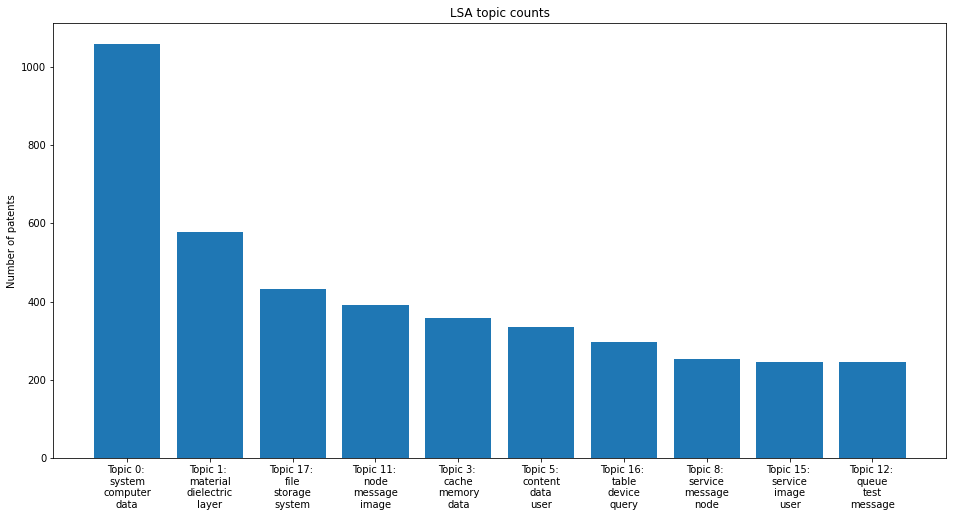

In [5]:
# Perform LSA using the results from TFIDF
word_topic_matrix, topic_doc_matrix = lsa_compute_cached(word_doc_matrix, cache_dir=CACHE_DIR,n_topics=20, method='SVD')

# Plot most frequent topics, and show the top 3 words for each
topic_words = get_topic_words(word_topic_matrix, words_list, N=3)
topic_counts = get_topic_counts(topic_doc_matrix)
plot_lsa(topic_words, topic_counts,10)